In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("D:/Python/covid19_Confirmed_dataset.csv")
dataset.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
dataset.shape

(266, 103)

In [4]:
# Deleting the useless column
df = dataset.drop(["Lat", "Long"], axis=1, inplace=True)

In [5]:
dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
# aggregate the rows by country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 100)

In [9]:
# Visualise data related to a country
corona_dataset_aggregated.loc["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

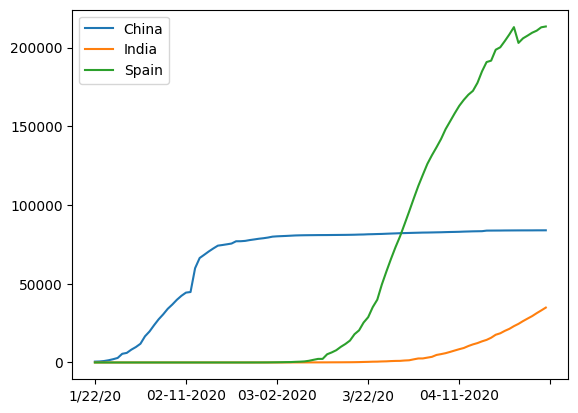

In [10]:
# Visualise data related to a country
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

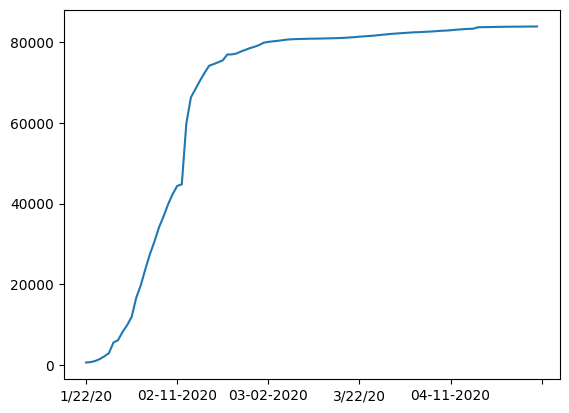

In [11]:
# Calculate a good measure
corona_dataset_aggregated.loc["China"].plot()

<Axes: >

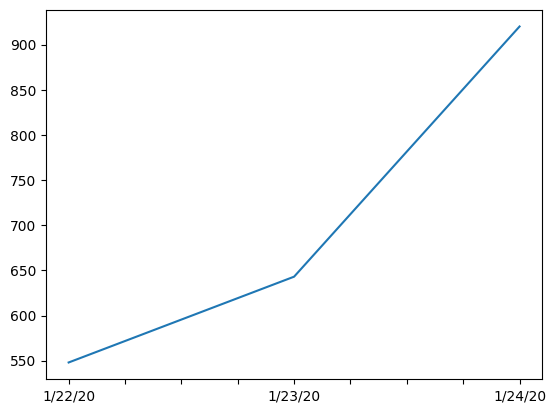

In [12]:
corona_dataset_aggregated.loc["China"][:3].plot()

<Axes: >

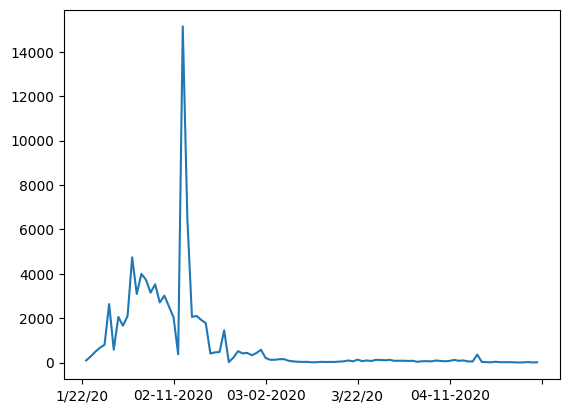

In [13]:
# Calculate the first derivate of the curve
corona_dataset_aggregated.loc["China"].diff().plot()

In [14]:
# Maximum Infection rate China
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [15]:
# Maximum Infection rate India
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [16]:
# Maximum Infection rate Spain
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [17]:
countries = list(corona_dataset_aggregated.index)
max_infections_rates = []

for c in countries:
    max_infections_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infections_rates"] = max_infections_rates

In [18]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infections_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [19]:
# Create a new Data Frame
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infections_rates"])

In [20]:
corona_data

,Max_infections_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [1]:
variable_1 = 12
variable_2 = 13
c= variable_1 + variable_2
print(c)

25
